## Word2Vec CBOW

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
def one_hot_encoding(word, word_dict):
    return np.eye(len(word_dict))[word_dict[word]]

In [4]:
def get_batch(dataset, batch_size):
    inputs = []
    labels = []
    random_index = np.random.choice(range(len(dataset)), batch_size, replace = False)
    
    for i in random_index:
        inputs.append(dataset[i][0])
        labels.append(dataset[i][1])
        
    return inputs, labels

In [5]:
# Model
class CBOW(nn.Module):
    def __init__(self, voc_size, embedding_size):
        super(CBOW, self).__init__()
        self.W = nn.Embedding(voc_size, embedding_size)
        self.WT = nn.Linear(embedding_size, voc_size, bias = False)
    
    def forward(self, X):
        # [batch_size, window_size*2]
        # One_hot_encoding : [batch_size, window_size*2, voc_size]
        p_layer = self.W(X) # projection_layer : [batch_size, window_size*2, embedding_size]
        p_layer = p_layer.mean(dim = 1) # mean_Weight = [batch_size, embedding_size]
        output = self.WT(p_layer)
        return output

In [6]:
corpus = [
    'drink cold milk',
    'drink cold water',
    'drink cold cola',
    'drink sweet juice',
    'drink sweet cola',
    'eat delicious bacon',
    'eat sweet mango',
    'eat delicious cherry',
    'eat sweet apple',
    'juice with sugar',
    'cola with sugar',
    'mango is fruit',
    'apple is fruit',
    'cherry is fruit',
    'Berlin is Germany',
    'Boston is USA',
    'Mercedes from Germany',
    'Mercedes is car',
    'Ford from USA',
    'Ford is car'
]

In [7]:
word_list = ' '.join(corpus).split()
word_set = list(set(word_list))
word_dict = {w:i for i, w in enumerate(word_set)}

In [8]:
window_size = 2

dataset = []
for i in range(window_size,len(word_list)-window_size):
    context = [word_dict[word_list[i-ws]] for ws in range(window_size,0, -1)] + \
    [word_dict[word_list[i+ws]] for ws in range(1,window_size+1)] # right context
    target = word_dict[word_list[i]]
    dataset.append([context, target])

In [9]:
dataset[:5]

[[[0, 6, 0, 6], 15],
 [[6, 15, 6, 10], 0],
 [[15, 0, 10, 0], 6],
 [[0, 6, 0, 6], 10],
 [[6, 10, 6, 14], 0]]

In [10]:
batch_size = 10
voc_size = len(word_dict)
embedding_size = 2
epochs = 10000

In [11]:
model = CBOW(voc_size, embedding_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# train
for epoch in range(epochs):
    input_batch, label_batch = get_batch(dataset, batch_size)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    optimizer.zero_grad()
    output = model(input_batch)
    
    loss = criterion(output, label_batch)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 1000 == 0:
        print("Epoch : {}/{}, cost = {:.6f}".format(epoch+1, epochs, loss))

Epoch : 1000/10000, cost = 2.724238
Epoch : 2000/10000, cost = 2.391335
Epoch : 3000/10000, cost = 1.676287
Epoch : 4000/10000, cost = 1.970925
Epoch : 5000/10000, cost = 2.055114
Epoch : 6000/10000, cost = 1.737902
Epoch : 7000/10000, cost = 1.378262
Epoch : 8000/10000, cost = 1.492606
Epoch : 9000/10000, cost = 1.826920
Epoch : 10000/10000, cost = 0.987121


In [12]:
W, WT = model.parameters()

In [13]:
W.shape  # [voc_size, embedding_size]

torch.Size([25, 2])

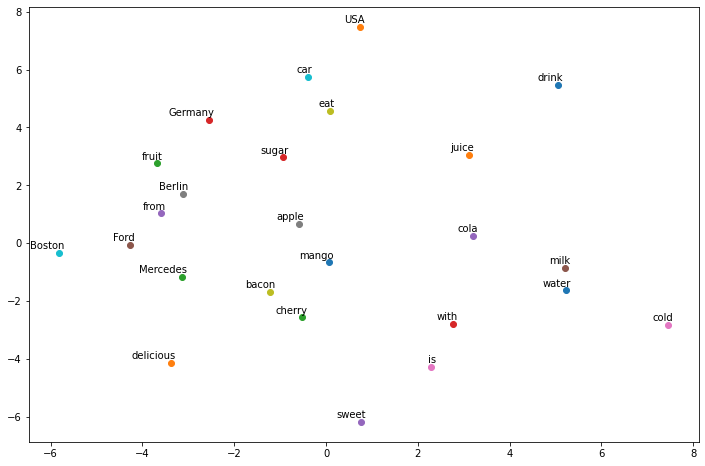

In [14]:
plt.figure(figsize = [12, 8])
for i, label in enumerate(word_dict):
    x, y = W[i][0].item(), W[i][1].item()
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()